In [2]:
from utils import *

In [3]:
train = pd.read_parquet('data_fusion_train.parquet')

In [4]:
train

,receipt_id,receipt_dayofweek,receipt_time,item_name,item_quantity,item_price,item_nds_rate,category_id,brands
0,7,5,09:50,Флуконазол капс 150мг №1 Вертекс,1.000,7,-1,-1,вертекс
1,11,6,20:34,"Молоко 3,2%,шт",2.000,8,2,78,None
2,39,4,11:28,"Борщ Станичный с тушенкой, 103 ккал (завод, з/у)",1.000,6,1,-1,None
3,39,4,11:28,"Компот из изюма, 114 ккал",1.000,4,1,71,None
4,39,4,11:28,"Макаронные изделия отварные (масло сливочное),...",1.000,4,1,71,None
...,...,...,...,...,...,...,...,...,...
45729304,10016159,4,12:39,"Карам.""Ломтик""апел/лимон/грейфр. 1кг Яшкино",0.283,10,-1,-1,None
45729310,10016159,4,12:39,СМЕТАНА 20% Залесский Фермер 200 г. пл.ст.,1.000,7,6,-1,залесский фермер
45729312,10016159,4,12:39,Слива Черная Пантера 1кг,0.439,11,-1,-1,None
45729314,10016159,4,12:39,"Хлеб ""Заварной"" ржано-пшен. 0,4г нарезка Берез.",1.000,8,-1,-1,None


In [7]:
train.brands.unique().shape, train.receipt_id.unique().shape

((17425,), (8127608,))

In [11]:
train = train[train.category_id != -1]

In [12]:
train.sample(n = 100, random_state = 1)

,receipt_id,receipt_dayofweek,receipt_time,item_name,item_quantity,item_price,item_nds_rate,category_id,brands
42897120,3786298,1,17:54,Рулет Перепелка с Клюквой к/в,0.493,14,6,71,перепелка
10325294,2598478,0,10:56,Кофе Максим 50г м/уп 1/18,1.000,10,1,85,None
25356029,5453693,5,12:41,ОКОРОК ИЗ СВИНИНЫ,0.928,12,2,79,None
23383468,1142320,6,11:13,Пакет,2.000,4,1,203,None
43268696,4603746,4,08:55,Сырок творожный МОЛОЧНАЯ СКАЗКА ваниль 8% перг...,1.000,6,2,78,None
...,...,...,...,...,...,...,...,...,...
19891741,3515952,1,22:30,Печенье ТЛ Творожное с изюмом 350г,1.000,9,1,84,None
719846,1584835,6,19:20,ГОРОШЕК ЗЕЛЕНЫЙ 400Г,2.000,6,1,75,None
10485292,2954797,5,19:23,Лонгер BBQ СБ,1.000,7,2,69,None
11411930,4970738,5,21:59,Пакет,1.000,6,1,203,None


In [23]:
train = train[train.category_id != -1].drop_duplicates('item_name')

<AxesSubplot:ylabel='category_id'>

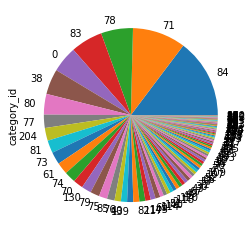

In [24]:
train.category_id.value_counts().plot.pie()

<AxesSubplot:ylabel='category_id'>

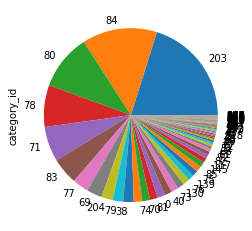

In [13]:
train[train.category_id != -1].category_id.value_counts().plot.pie()

In [14]:
train.shape

(6483226, 9)

In [15]:
train[train.category_id == 84].sample(n = 78)

,receipt_id,receipt_dayofweek,receipt_time,item_name,item_quantity,item_price,item_nds_rate,category_id,brands
33651137,3587383,4,17:45,Пирожок с мясом,3.000,7,5,84,None
2934268,6428599,3,20:02,FITNESS БАТ.ЗЛАК.ШОК,1.000,6,2,84,fitness
28712080,2793391,4,20:03,140Г ПРЯНИК ТУЛЬСКИЙ СМОРОДИН,1.000,6,1,84,None
39021571,5334501,3,17:11,Половинка багета Organic Plane,1.000,10,2,84,organic
31266400,8373054,5,16:16,Буузы 70 гр.*,6.000,7,6,84,None
...,...,...,...,...,...,...,...,...,...
30672579,7085002,2,11:04,Пирожки жареные с ливером 75,1.000,5,1,84,None
43262074,4589823,1,12:59,Печенье Деревенское с кунжутом вес Сладкая Сло...,0.226,12,1,84,сладкая слобода
3773661,8265049,1,11:08,Пирожки печеные со свежей капустой и яйцом 75г...,2.000,4,1,84,None
29548623,4625030,1,19:28,Хлеб Чиабатта,0.173,11,2,84,None


In [20]:
grouped = train.groupby(by='receipt_id').agg(['mean', 'count'])

In [22]:
grouped.describe()

receipt_dayofweek               item_quantity                \
                   mean         count          mean         count   
count      3.704041e+06  3.704041e+06  3.704041e+06  3.704041e+06   
mean       3.024772e+00  1.750312e+00  1.592400e+00  1.750312e+00   
std        1.984867e+00  1.312923e+00  1.863637e+01  1.312923e+00   
min        0.000000e+00  1.000000e+00  1.000000e-03  1.000000e+00   
25%        1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
50%        3.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
75%        5.000000e+00  2.000000e+00  1.255000e+00  2.000000e+00   
max        6.000000e+00  3.700000e+01  1.840000e+04  3.700000e+01   

         item_price               item_nds_rate                 category_id  \
               mean         count          mean         count          mean   
count  3.704041e+06  3.704041e+06  3.704041e+06  3.704041e+06  3.704041e+06   
mean   6.930279e+00  1.750312e+00  2.054026e+00  1.750312e+00  1.087752e+02   
std    3.506207e+00  1.312923e+00  1.983785e+00  1.312923e+00  5.380457e+01   
min    0.000000e+00  1.000000e+00 -1.000000e+00  1.000000e+00  0.000000e+00   
25%    4.500000e+00  1.000000e+00  1.000000e+00  1.000000e+00  7.666667e+01   
50%    7.000000e+00  1.000000e+00  1.400000e+00  1.000000e+00  8.400000e+01   
75%    9.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  1.415000e+02   
max    3.400000e+01  3.700000e+01  6.000000e+00  3.700000e+01  2.040000e+02   

                     
              count  
count  3.704041e+06  
mean   1.750312e+00  
std    1.312923e+00  
min    1.000000e+00  
25%    1.000000e+00  
50%    1.000000e+00  
75%    2.000000e+00  
max    3.700000e+01